---
title: Crosswell Tomography Inversion 2D
description: ''
short_title: ''
date: '2022-06-16T18:19:35.856Z'
name: 2d-crosswell-tomography
binder: >-
  https://mybinder.org/v2/gh/geoscixyz/inversion-module/HEAD?filepath=2D-LinearInversion-Crosswell-Tomorgraphy.ipynb
venue: Notebooks
oxa: oxa:VNMrkxzChhdveZyf6lmb/dypivu1U6atwEUVOB9Nm
tags: []
keywords: []
thumbnail: thumbnails/2d-crosswell-tomography.png
---

# 2D Linear Inversion of Crosswell Tomography Data 

In [ ]:
import numpy as np
from geoscilabs.inversion.TomographyInversion import TomographyInversionApp
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib inline

# Purpose

From the Linear inversion notebook (1D), we learned important apsects about the linear inversion. 
However, real world geophysical inverse problem are not often 1D, but multidimensional (2D or 3D), and this extension of dimension allows us to put more apriori (or geologic) information through the regularization term. 
In this notebook, we explore these multidimensional aspects of the linear inversion by using 2D traveltime croswell tomography example. 

## Outline
This notebook includes three steps:
- Step 1: Generate a velocity model
- Step 2: Simulate traveltime data and add noise
- Step 3: Run $l_2$ inversion

## Step 1: Generate a velocity model

Here we set up a velocity model using a following app. Controlling parameters of the app are:

- `set mesh`: use active **only** when you want to change the 2D mesh
- `add block`: use active when you want to add block (if not stay inactive)
- `model type`: background or block
- `show grid?`: show grid of the mesh

- `v0`: velocity of the background
- `v1`: velocity of the block
- `xc`: x center of the block
- `yc`: y center of the block
- `dx`: width of the block
- `dz`: thickness of the block
- `nx`: # of cells in x-direction (this is only active when `set_mesh=active`)
- `ny`: # of cells in y-direction (this is only active when `set_mesh=active`)

Re-running the following cell will reset the app to the default parameters.

----
### Changing # of cells in $x$- or $z$- direction
Adjustable parameters: `set mesh`, `nx`, `ny`

The 2D domain is fixed at 200m $\times$ 400m.  The number of cells in each direction can be changed which alters the size of cells in each direction. To change either `nx` or `ny`:
1. Set `set mesh=active`. This will change the view to the background model `v0`.
2. Adjust `nx` and or `ny` using the sliders. The size of the cells is diplayed above the model.
3. When finished adjusting the mesh set `set mesh=inactive`. 
----
### Changing the background model
Adjustable parameters:  `model type`, `v0`

To change the value of the constant background velocity model:
1. Set `model type=background`. This will change the view to the background model `v0`.
2. Adjust `v0` using the slider. 
3. When finished ajusting set `model type=block`
----
### Changing the parameters of a single block
Adjustable parameters:  `add block`, `model type`, `v1`, `xc`, `zc`, `dx`, `dz`

To change the parameters of a single block model (default):
1. Set `add block=active`.
2. Adjust `v1`, `xc`, `zc`, `dx`, `dz` using the sliders. The original block settings will remain in view.
3. When finished ajusting set `model type=background`
4. To confirm the parameter changes and veiw the current block, set `model type=block`
----
### Adding more blocks
Adjustable parameters:  `add block`, `v1`, `xc`, `zc`, `dx`, `dz`

The model can contain multiple blocks. To add new blocks to the model:
1. Set `add block=inactive`
2. Adjust the parameters of the new block `v1`, `xc`, `zc`, `dx`, `dz`. The velocity model will not change yet. The white boundary of the new block serves as a preview.
3. When finished adjusting the new block parameters set `add block=active`. The velocity model will be updated with the new block.
4. Repeat Steps 1-3 to add more blocks. 

The parameters of the blocks in a multi-block model cannot be changed once the block has been added. Attempting to adjust the parameters after the block has been added to the model (following the directions in the previous section "Changing the parameters of a single block") will remove all previous blocks.  A single block model with the current block is created.

In [2]:
app = TomographyInversionApp()
app.interact_plot_model()

## Step 2: Simulate travel time data and add noise

Within this app, by using the velocity model set up above, we simulate traveltime tomography data and add Gaussian noise. This syntehtic data set will be used in the following inversion module. Controlling parameters are:

- `percent (%)`: percentage of the Gaussian noise
- `floor (s)`: floor of the Gaussain noise
- `random seed`: seed to generate random variables having normal distribution
- `tx_rx_plane` or `histogram`: data display options
- `update`: this buttion is for the interaction with the Step 1 app. If the velocity model is changed by altering the first app, you can simply click `update` to run simulation again with the updated velocity model. 


In [3]:
app.interact_data()

## Step 3: $l_2$ inversion

Here we invert the data generated in Step 2 and explore the results. Step 3 is divided into four sections: 

- Step 3.1: Run inversion
- Step 3.2: Plot recovered model
- Step 3.3: Plot predicted data
- Step 3.4: Plot misfit curves


### Step 3.1: Run inversion

The inversion, run in the cell below, requires the following input parameters, each of which can be adjusted:

- `maxIter`: maximum number of iterations
- `m0`: initial model
- `mref`: reference model
- `percentage`: percent standard deviation for the uncertainty
- `floor`: floor value for the uncertainty
- `chifact`: chifactor for the target misfit
- `beta0_ratio`: ratio to set the initial beta
- `coolingFactor`: cooling factor to cool beta
- `n_iter_per_beta`: # of interations for each beta value 
- `alpha_s`: $\alpha_s$
- `alpha_x`: $\alpha_x$
- `alpha_z`: $\alpha_z$
- `use_target`: use target misfit as a stopping criteria or not

In [4]:
model, pred, save = app.run_inversion(
    maxIter=20,
    m0=1./1000.,
    mref=1./1000.,
    percentage=0,
    floor=0.01,
    chifact=0.1,
    beta0_ratio=1e2,
    coolingFactor=2,
    n_iter_per_beta=1,
    alpha_s=1/(app.mesh_prop.hx.min())**2,
    alpha_x=1,
    alpha_z=1,
    use_target=True
)

0.1

        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
        ***Done using same Solver and solverOpts as the problem***
SimPEG.SaveOutputEveryIteration will save your inversion progress as: '###-InversionModel-2021-03-11-21-26.txt'
model has any nan: 0
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  1.59e+07  3.40e+02  0.00e+00  3.40e+02    1.12e+04      0              
   1  7.97e+06  1.47e+02  1.07e-06  1.56e+02    4.92e+04      0              
   2  3.98e+06  1.33e+02  2.36e-06  1.42e+02    4.72e+04      0   Skip BFGS  
   3  1.99e+06  1.16e+02  5.55e-06  1.27e+02    4.31e+04      0   Skip BFGS  
   4  9.96e+05  9.70e+01  1.23e-05  1.09e+02    3.79e+04      0   Skip BFGS  
   5  4.98e+05  7.91e+01  2.51e-05  9.17e+01    3.24e+04      0   Skip BFG

### Step 3.2: Plot recovered model

The app below displays the:
- Recovered model from the inversion in Step 3.1 (left) 
- True model generated in Step 1 (right)

The model view is changed using:

- `ii`: each iteration of the inversion  (`ii`=0 is the initial model `m0`)
- `fixed`: when selected the colorbar of both plots have the same fixed limits


In [5]:
app.interact_model_inversion(model, clim=None)

interactive(children=(IntSlider(value=0, description='ii', max=14), Checkbox(value=False, description='fixed')…

### Step 3.3: Plot predicted data 

The app below displays the:
- Obversed data calculated in Step 2 (left) 
- Predicted data from the inversion in Step 3.1 (center)
- Normalized misfit between the observed and predicted data (right)

The predicted data and normalized misfit view is changed using:
- `ii`: each iteration of the inversion  (`ii`=0 is the initial model `m0`)
- `fixed`: when selected the colorbar of both data plots have the same fixed limits

In [6]:
app.interact_data_inversion(pred)

interactive(children=(IntSlider(value=0, continuous_update=False, description='ii', max=14), Checkbox(value=Fa…

### Step 3.4: Plot misfit curves

1. Plot of the data misfit and model norm values as functions of inversion iteration
2. Tikhonov curves with the optimal values indicated by the star
    1. Data misfit as a function of trade-off parameter $\beta$
    2. Model norm as a function of trade-off parameter $\beta$
    3. Data misfit versus model norm

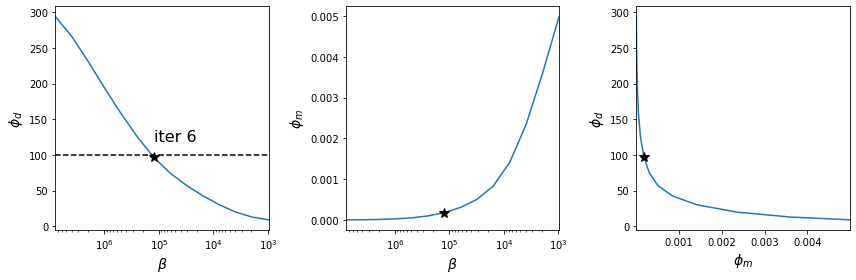

In [7]:
app.plot_tikhonov_curves(save);